In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('transport.csv', delimiter=';')

regions_to_keep = [
    'The Netherlands',
    'Extremely urbanised',
    'Strongly urbanised',
    'Moderately urbanised',
    'Hardly urbanised',
    'Not urbanised'
]

modes_to_keep = [
    'Passenger car (driver)',
    'Bus/tram/metro',
    'Train'
]
1
df2 = df[df['Region characteristics'].isin(regions_to_keep)]
df2 = df2[df2['Modes of travel'].isin(modes_to_keep)]
df2 = df2.drop(columns=['Margins', 'Population'])

df2.head(50)

,Modes of travel,Periods,Region characteristics,Transport performance (billion passenger kilometres )
132,Passenger car (driver),2018,The Netherlands,108.8
133,Passenger car (driver),2019,The Netherlands,108.5
134,Passenger car (driver),2020,The Netherlands,79.4
135,Passenger car (driver),2021,The Netherlands,85.6
136,Passenger car (driver),2022,The Netherlands,92.9
137,Passenger car (driver),2023,The Netherlands,99.6
234,Passenger car (driver),2018,Extremely urbanised,19.1
235,Passenger car (driver),2019,Extremely urbanised,18.5
236,Passenger car (driver),2020,Extremely urbanised,13.8
237,Passenger car (driver),2021,Extremely urbanised,15.2


In [77]:
df2['Transport performance (billion passenger kilometres )'] = pd.to_numeric(
    df2['Transport performance (billion passenger kilometres )'], errors='coerce'
)

In [78]:
public_transport_df = df2[df2['Modes of travel'].isin(['Train', 'Bus/tram/metro'])]
public_transport_sum = public_transport_df.groupby(
    ['Periods', 'Region characteristics'], as_index=False
)['Transport performance (billion passenger kilometres )'].sum()
public_transport_sum = public_transport_sum.sort_values(by=['Region characteristics', 'Periods'])
public_transport_sum = public_transport_sum.reset_index(drop=True)


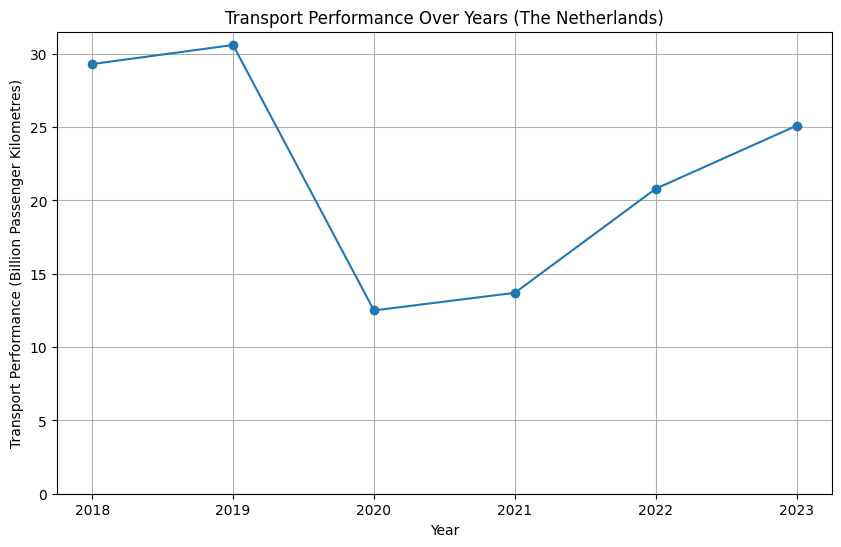

In [79]:
netherlands_data = public_transport_sum[public_transport_sum['Region characteristics'] == 'The Netherlands']

plt.figure(figsize=(10, 6))
plt.plot(
    netherlands_data['Periods'],
    netherlands_data['Transport performance (billion passenger kilometres )'],
    marker='o',
    linestyle='-'
)
plt.title('Transport Performance Over Years (The Netherlands)')
plt.xlabel('Year')
plt.ylabel('Transport Performance (Billion Passenger Kilometres)')
plt.ylim(0)
plt.grid()
plt.show()

/var/folders/5q/tcpl69t93xl_4n6g5v6mqb2r0000gn/T/ipykernel_18607/3867727301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Periods'] = filtered_data['Periods'].astype(int)
/var/folders/5q/tcpl69t93xl_4n6g5v6mqb2r0000gn/T/ipykernel_18607/3867727301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Transport performance (billion passenger kilometres )'] = filtered_data[


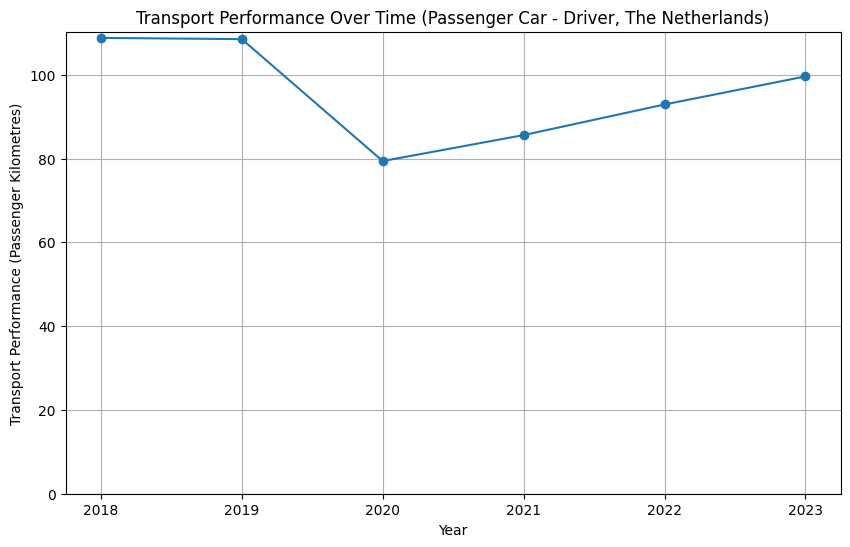

In [80]:
filtered_data = df2[
    (df2['Modes of travel'] == 'Passenger car (driver)') &
    (df2['Region characteristics'] == 'The Netherlands')
]

filtered_data['Periods'] = filtered_data['Periods'].astype(int)
filtered_data['Transport performance (billion passenger kilometres )'] = filtered_data[
    'Transport performance (billion passenger kilometres )'
].astype(float)


plt.figure(figsize=(10, 6))
plt.plot(
    filtered_data['Periods'],
    filtered_data['Transport performance (billion passenger kilometres )'],
    marker='o',
    linestyle='-'
)
plt.title('Transport Performance Over Time (Passenger Car - Driver, The Netherlands)')
plt.xlabel('Year')
plt.ylabel('Transport Performance (Passenger Kilometres)')
plt.ylim(0)
plt.grid()
plt.show()


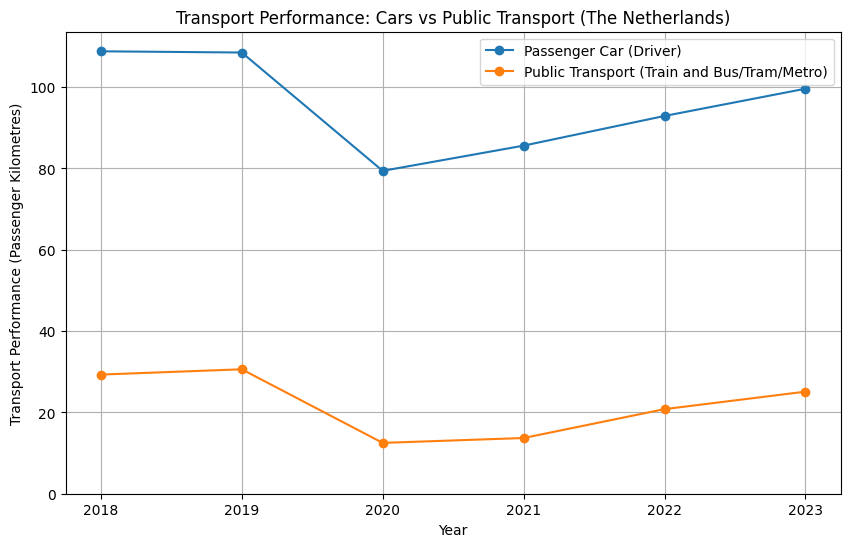

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(
    filtered_data['Periods'],
    filtered_data['Transport performance (billion passenger kilometres )'],
    marker='o',
    linestyle='-',
    label='Passenger Car (Driver)'
)

plt.plot(
    netherlands_data['Periods'],
    netherlands_data['Transport performance (billion passenger kilometres )'],
    marker='o',
    linestyle='-',
    label='Public Transport (Train and Bus/Tram/Metro)'
)

plt.title('Transport Performance: Cars vs Public Transport (The Netherlands)')
plt.xlabel('Year')
plt.ylabel('Transport Performance (Passenger Kilometres)')
plt.ylim(0)
plt.legend()
plt.grid()
plt.show()

In [82]:
urbanisation_levels = [
    'Extremely urbanised',
    'Strongly urbanised',
    'Hardly urbanised',
    'Moderately urbanised',
    'Not urbanised'
]

car_data_by_urbanisation = df2[
    (df2['Modes of travel'] == 'Passenger car (driver)') &
    (df2['Region characteristics'].isin(urbanisation_levels))
]
grouped_car_data = car_data_by_urbanisation.groupby(
    ['Region characteristics', 'Periods']
)['Transport performance (billion passenger kilometres )'].sum().reset_index()



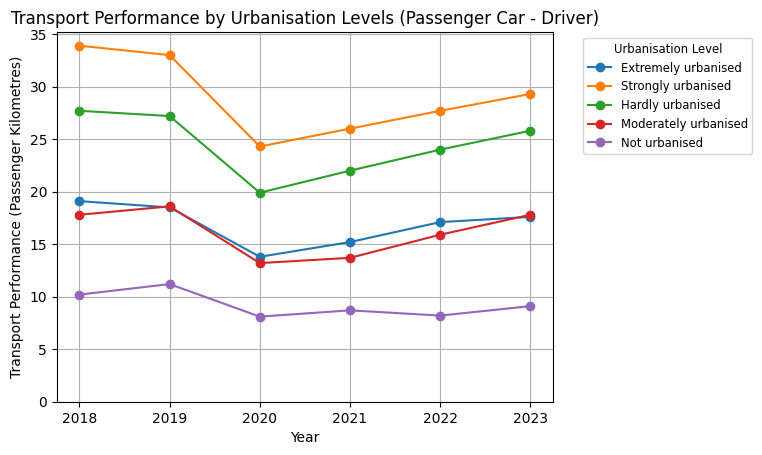

In [83]:
for level in urbanisation_levels:
    subset = grouped_car_data[grouped_car_data['Region characteristics'] == level]
    plt.plot(
        subset['Periods'],
        subset['Transport performance (billion passenger kilometres )'],
        marker='o',
        linestyle='-',
        label=level  
    )

plt.title('Transport Performance by Urbanisation Levels (Passenger Car - Driver)')
plt.xlabel('Year')
plt.ylabel('Transport Performance (Passenger Kilometres)')
plt.ylim(0)  
plt.legend(
    title='Urbanisation Level', 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1), 
    fontsize='small',  
    title_fontsize='small'  
)

plt.grid()
plt.show()

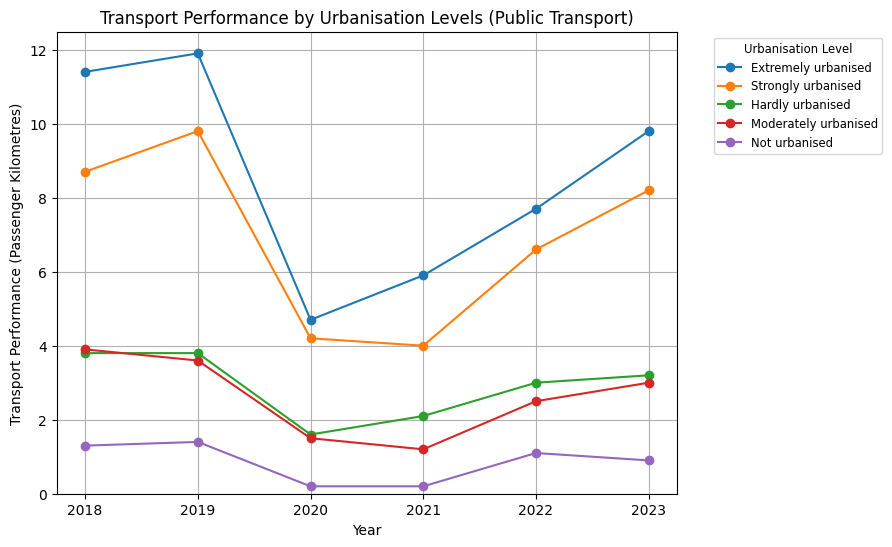

In [84]:
public_transport_filtered = public_transport_sum[
    public_transport_sum['Region characteristics'].isin(urbanisation_levels)
]

plt.figure(figsize=(8, 6))  

for level in urbanisation_levels:
    subset = public_transport_filtered[public_transport_filtered['Region characteristics'] == level]
    plt.plot(
        subset['Periods'],
        subset['Transport performance (billion passenger kilometres )'],
        marker='o',
        linestyle='-',
        label=level
    )

plt.title('Transport Performance by Urbanisation Levels (Public Transport)')
plt.xlabel('Year')
plt.ylabel('Transport Performance (Passenger Kilometres)')
plt.ylim(0)
plt.grid()

plt.legend(
    title='Urbanisation Level', 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1), 
    fontsize='small', 
    title_fontsize='small'  
)

plt.show()